<a href="https://colab.research.google.com/github/IIrootbossII/DLFramework/blob/main/DLFrameworkHW%20(201904080%20%EC%9D%B4%EB%AF%BC%EC%84%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.7969 - loss: 0.6398 - val_accuracy: 0.9832 - val_loss: 0.0523
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9701 - loss: 0.0975 - val_accuracy: 0.9858 - val_loss: 0.0417
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9813 - loss: 0.0658 - val_accuracy: 0.9895 - val_loss: 0.0307
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9901 - val_loss: 0.0270
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9872 - loss: 0.0424 - val_accuracy: 0.9911 - val_loss: 0.0276
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9897 - loss: 0.0352 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9921 - val_loss: 0.0233
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9916 - loss: 0

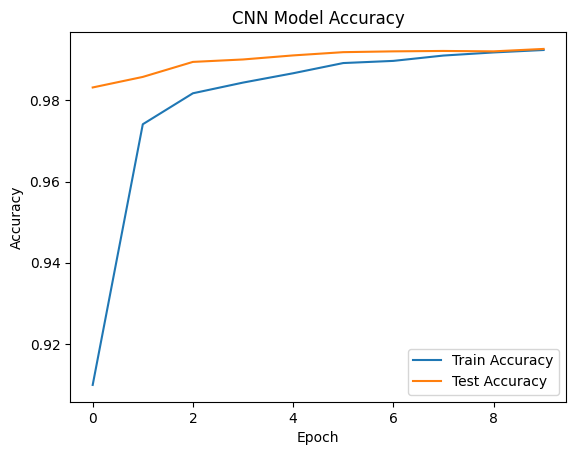

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # 0~1 범위로 정규화
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN 모델 구성
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1st Conv Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                                              # Pooling
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),                           # 2nd Conv Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),                                                                   # Flatten Layer
    tf.keras.layers.Dense(128, activation='relu'),                                               # Dense Layer
    tf.keras.layers.Dropout(0.5),                                                                # Dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')                                              # Output Layer
])

# 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 정확도 출력
train_acc = history_cnn.history['accuracy'][-1]
test_acc = history_cnn.history['val_accuracy'][-1]
print(f"CNN 모델 훈련 정확도: {train_acc*100:.2f}%, 테스트 정확도: {test_acc*100:.2f}%")

# 학습 결과 그래프
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8645 - loss: 0.4481 - val_accuracy: 0.9670 - val_loss: 0.1042
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9667 - loss: 0.1086 - val_accuracy: 0.9742 - val_loss: 0.0840
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9767 - loss: 0.0738 - val_accuracy: 0.9741 - val_loss: 0.0782
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9828 - loss: 0.0539 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9818 - val_loss: 0.0632
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9819 - val_loss: 0.0620
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9810 - val_loss: 0.0623
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9903 - loss: 0.0308 - va

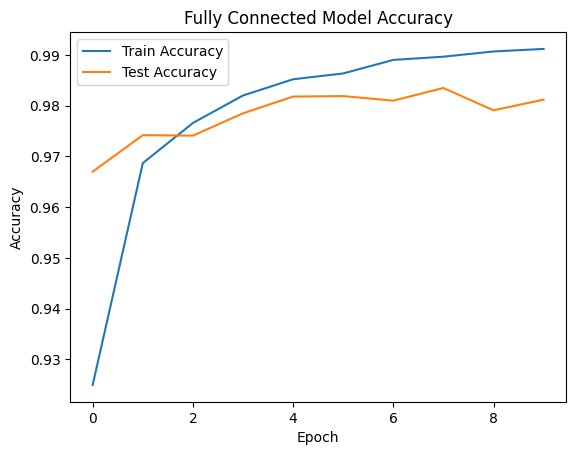

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # 0~1 범위로 정규화
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Fully Connected 모델 구성
fc_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),  # 1st Dense Layer
    tf.keras.layers.Dropout(0.2),                                           # Dropout
    tf.keras.layers.Dense(512, activation='relu'),                          # 2nd Dense Layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')                         # Output Layer
])

# 모델 컴파일
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_fc = fc_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 정확도 출력
train_acc_fc = history_fc.history['accuracy'][-1]
test_acc_fc = history_fc.history['val_accuracy'][-1]
print(f"Fully Connected 모델 훈련 정확도: {train_acc_fc*100:.2f}%, 테스트 정확도: {test_acc_fc*100:.2f}%")

# 학습 결과 그래프
plt.plot(history_fc.history['accuracy'], label='Train Accuracy')
plt.plot(history_fc.history['val_accuracy'], label='Test Accuracy')
plt.title('Fully Connected Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 정확도 로그 파일 저장
with open('fc_accuracy_log.txt', 'w') as f:
    f.write(str(history_fc.history))